# Model training
Training the actual model that we'll deploy after getting its architecture from the previous step (nn_exploration).

In [1]:
from utils import *

In [2]:
import pandas as pd

# Data importation

dataframe = pd.read_csv('data/data.csv')

#Getting the columns
columns = dataframe.columns.values


In [3]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, TensorDataset

#Defining input features and target feature
input_cols = columns[[2,3,5]]
targets = columns[-1]

#Getting the tensors
inputs, targets = dataframe_to_torch(df,input_cols, targets)

#Creating the dataset
dataset = TensorDataset(inputs, targets)

#Test:15% training: 85%

test_size = round(0.15*len(dataset))


train_ds, test_ds = random_split(dataset , [len(dataset) - test_size, test_size])

batch_size = 128  #Change based on GPU capacity

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size*2, num_workers=4, pin_memory=True)

In [4]:
# Input and ouput values of the hidden layers (input the values from the cross-validation step)
architecture = (256,128,64,32)

# Model definition 
model = DeepNeuralNetwork(3, *architecture)

In [5]:
history = []

In [8]:
#Hyperparameters
epochs = 30
max_lr = 0.001
grad_clip = 0.001
weight_decay = 1e-4
opt_func = torch.optim.Adam

#Training

history += fit_one_cycle(epochs, max_lr, model, train_loader, test_loader, weight_decay, grad_clip, opt_func)

Epoch [0], last_lr: 0.00007, train_loss: 0.4150, val_loss: 0.4208, val_acc: 0.7955
Epoch [1], last_lr: 0.00015, train_loss: 0.4155, val_loss: 0.4205, val_acc: 0.7971
Epoch [2], last_lr: 0.00028, train_loss: 0.4152, val_loss: 0.4196, val_acc: 0.7958
Epoch [3], last_lr: 0.00044, train_loss: 0.4145, val_loss: 0.4184, val_acc: 0.7966
Epoch [4], last_lr: 0.00060, train_loss: 0.4169, val_loss: 0.4193, val_acc: 0.7961
Epoch [5], last_lr: 0.00076, train_loss: 0.4156, val_loss: 0.4203, val_acc: 0.7971
Epoch [6], last_lr: 0.00089, train_loss: 0.4162, val_loss: 0.4194, val_acc: 0.7942
Epoch [7], last_lr: 0.00097, train_loss: 0.4149, val_loss: 0.4211, val_acc: 0.7976
Epoch [8], last_lr: 0.00100, train_loss: 0.4154, val_loss: 0.4151, val_acc: 0.7987
Epoch [9], last_lr: 0.00099, train_loss: 0.4135, val_loss: 0.4182, val_acc: 0.7945
Epoch [10], last_lr: 0.00098, train_loss: 0.4139, val_loss: 0.4212, val_acc: 0.7932
Epoch [11], last_lr: 0.00095, train_loss: 0.4128, val_loss: 0.4168, val_acc: 0.7981
Ep

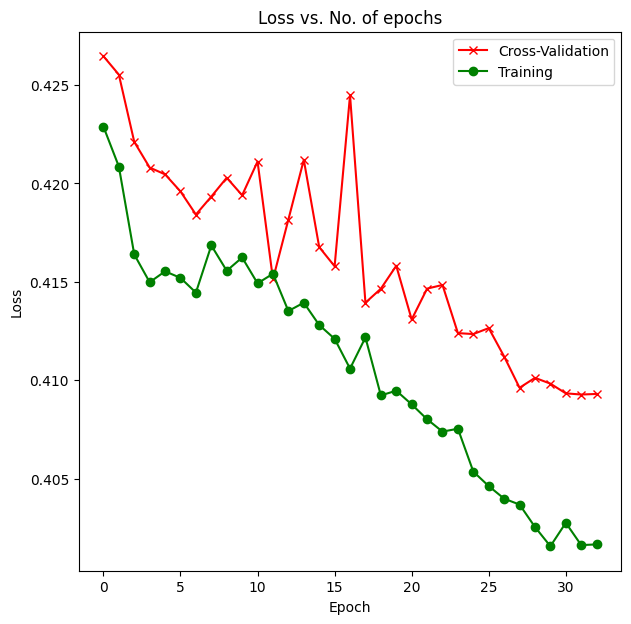

In [9]:
plot_losses(history)

In [ ]:
#This step creates a readable model for a variety of programing languages.
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('model.pt') # Save
#ONNX export
dummy_input = torch.randn() #cambiar luego
torch.onnx.export(model, dummy_input, 'model.onnx', verbose=True)